# Haberman's survival dataset -- exploratory data analysis

## Description:-

#### The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.(From kaggle.com)

# various attributes in the data set are as described below :


#### age :- age of the patient when they were treated (numeric value)
#### year :- year in which the patient was treated (numeric value)
#### nodes :- number of positive lymbh nodes when they were treated
#### status :- status value = 1(patient survives 5year or longer than that), status value=2(patient survives less than 5 years)

## objective :-
### Our objective is to predict the status of the patient given 3 attributes which are there age, year(when they were executed), nodes(number of positive nodes when they were treated)


# (4.1) Basic terminology :-

## Haberman's survival dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#now we will import the data set which is in the csv format using pandas

cancer=pd.read_csv("haberman.csv")
cancer

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [3]:
# how many data points are there in our data set?

cancer.shape

(306, 4)

In [4]:
# what are the names of the columns present in our data set?
cancer.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [14]:
# how many patients were there who survived more than or equal to five years or vice versa?

cancer["status"].value_counts(2)

1    0.735294
2    0.264706
Name: status, dtype: float64

### Till now we have succesfully loaded the data and converted it into the dataframe named cancer , this data set is the collection of only 306 patients given the 4 attributes namely age, year, nodes, status .
### From the above code we get the result that there are 73% of patients who survived equal to or more than five years and there are 26% of people of died within 5 years.

# (4.2) 2-d scater plot

Text(0.5, 1.08, 'Scatter plot between year and age of the patients')

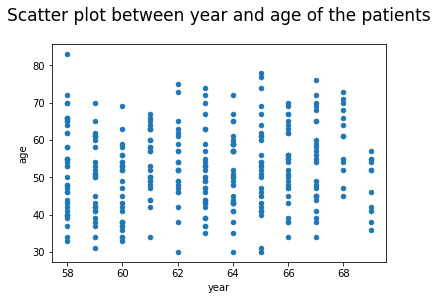

In [6]:
# now we have to plot this dataset on 2 dimensions thus we can choose two features and plot the graph
cancer.plot(kind="scatter", x="year", y="age");
plt.show
plt.title("Scatter plot between year and age of the patients", fontsize=17,y=1.08)
#this graph which gets plotted doesn't depict any usefull data hence what if we can provide colors to the data points

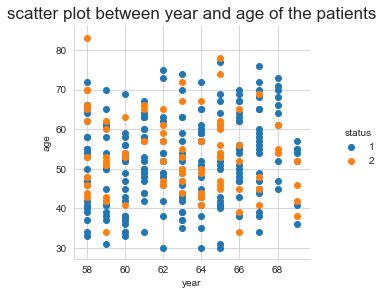

In [8]:
sns.set_style("whitegrid");
sns.FacetGrid(cancer, hue="status", height=4) \
   .map(plt.scatter, "year", "age") \
   .add_legend();
plt.title("scatter plot between year and age of the patients", fontsize=17,y=1.08)
plt.show();
# we got the points plotted as under but this also not seems much beneficial to us.
# we can observe that the patients whose age was 30 years or less have a status of 1 i.e. they survived more then 5 years.
# what if we can compare other two features of the data set and see the result?
# we can use pair plots to plot the graphs between different features of the data set.
# pair plots can be used to depict some useful data to visualize only 2d data sets.

# (4.3) Pair plots :-

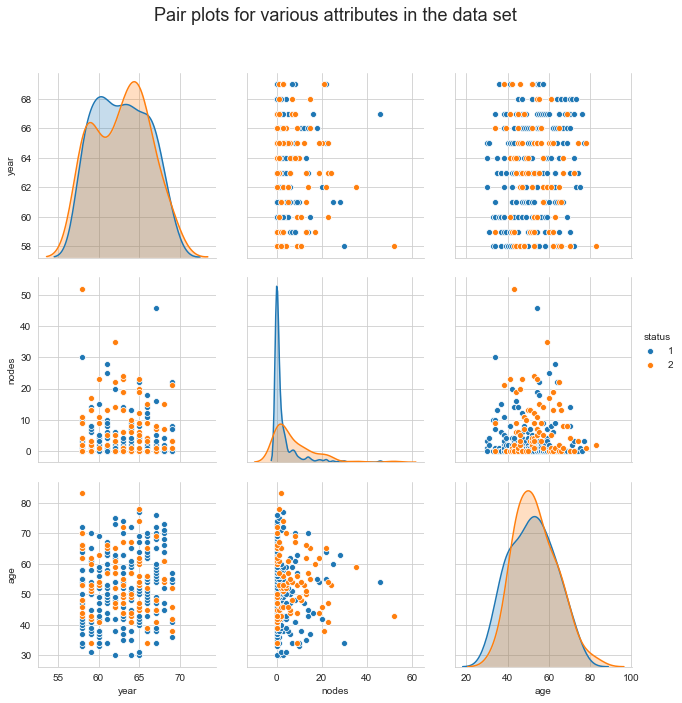

In [10]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(cancer, hue="status", height=3,vars=["year","nodes","age"]);
plt.suptitle("Pair plots for various attributes in the data set",fontsize=18,y=1.08)
plt.show()

## Observations :-

### 1.) We got 9 pairplots in which all the diagonal plots shows the pdf of the various two features in our data set.
### 2.) Out of all the pair plots , The pair plot between the nodes and age when the patient was treated seems to be of great importance to us.
### 3.) All the other pair plots are so mixed up that the predicting something out of it is not at all trivial task to do.
### 4.) We can also draw some insights from the pair plot between the nodes and the year in which they were treated to pridict some useful numbers out of the given dataset.
### 5.) We can use the concepts of pdf and cdf on these pairplots to predict the usefull numbers ahead in the analysis of this dataset.

# (4.4) Histogram , PDF ,CDF

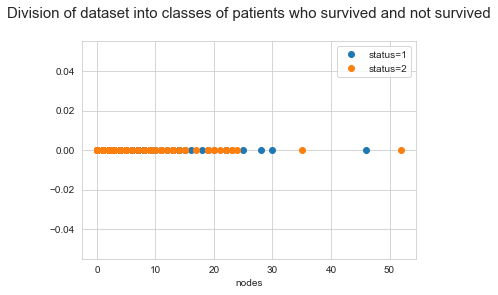

In [69]:
import numpy as np
patient_survives =cancer.loc[cancer["status"] == 1];
patient_not_survives = cancer.loc[cancer["status"] == 2];
plt.plot(patient_survives["nodes"], np.zeros_like(patient_survives["nodes"]), "o")
plt.plot(patient_not_survives["nodes"], np.zeros_like(patient_not_survives["nodes"]), "o")
plt.title("Division of dataset into classes of patients who survived and not survived",fontsize=15,y=1.08)
plt.xlabel("nodes")
plt.legend(["status=1","status=2"])
plt.show()
# here we have used feature nodes to predict the survival but all these points are very overlapping
# Similarly we can construct other univariate analysis of the features but results can be same overlapping.
# we can use pdf to give much clearer understanding of the features as show below

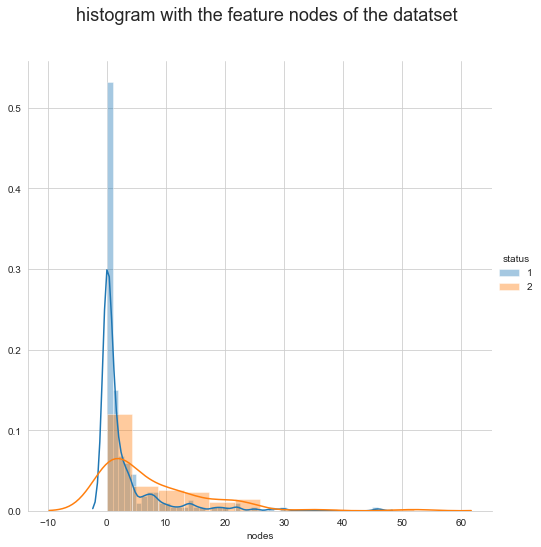

In [17]:
#histogram analysis of the dataset using the feature nodes.
sns.FacetGrid(cancer, hue="status", height=7) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.suptitle("histogram with the feature nodes of the datatset",fontsize=18,y=1.08)
plt.show();

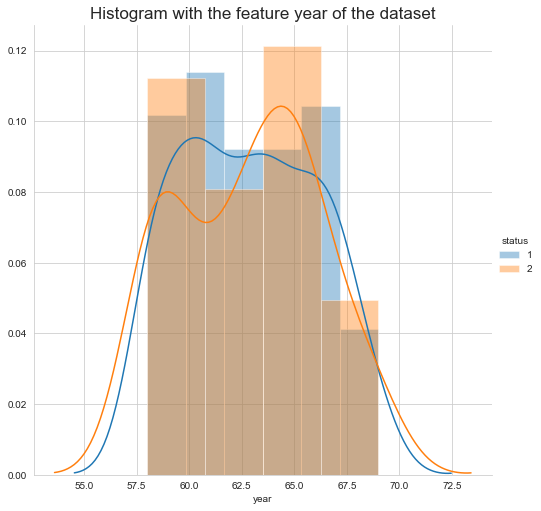

In [26]:
#histogram analysis of the feature year in the dataset.

sns.FacetGrid(cancer, hue="status", height=7) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title("Histogram with the feature year of the dataset",fontsize=17,y=1.08)
plt.show();

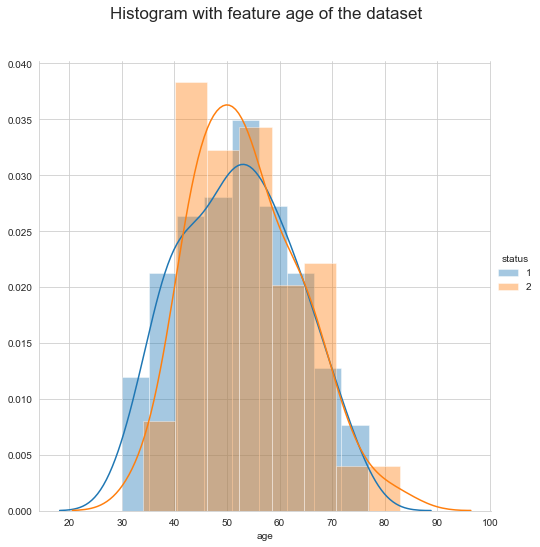

In [21]:
#histogram analysis of the feature age of the dataset.
sns.FacetGrid(cancer, hue="status", height=7) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.suptitle("Histogram with feature age of the dataset", fontsize=17,y=1.08)
plt.show();

## Observations:-
### 1.)All the histograms we plotted  are overlapping each other on various features we used to construct them.
### 2.)Though the histogram we plotted using the nodes as the feature Shows quite good results and is far much better than the other histograms.
### 3.)From the histogram plotted on the feature nodes clearly shows that if the number of nodes are less there is huge probabilty that the person will survive more than 5 years.
### 4.)Taking account of all the observations till now we can proceed to construct the CDF to get a much clearer picture of what is happening in the dataset.
### 5.) CDF can give us the actual numbers or the percentage of patients that survive on having definite amount of nodes as part of their treatment.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


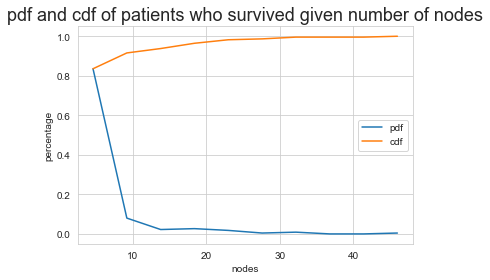

In [71]:
#construct a cdf of feature nodes on the given data set
#cdf will be of the patients that were able to survive more or equal to the 5 years.
counts, bin_edges = np.histogram(patient_survives["nodes"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf);
plt.title("pdf and cdf of patients who survived given number of nodes",fontsize=18)
plt.xlabel("nodes")
plt.ylabel("percentage")
plt.legend(["pdf","cdf"])

plt.show();

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


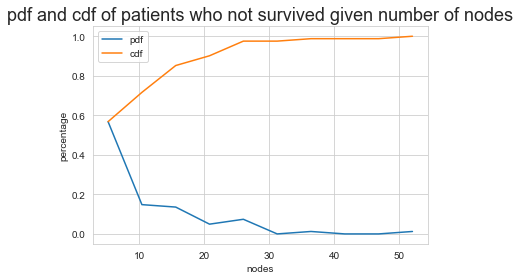

In [72]:
#construct a cdf of feature nodes on the given data set
# cdf will be of the patients who were not able to survive more or equal to 5 years.
counts, bin_edges = np.histogram(patient_not_survives["nodes"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf);
plt.title("pdf and cdf of patients who not survived given number of nodes",fontsize=18)
plt.xlabel("nodes")
plt.ylabel("percentage")
plt.legend(["pdf","cdf"])

plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


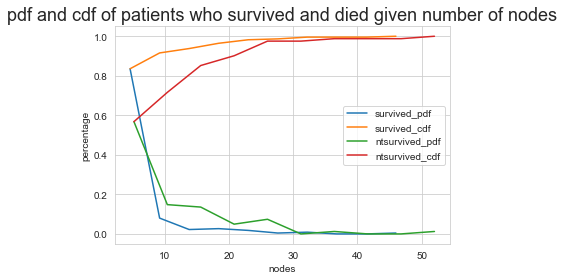

In [73]:
#combine plots of people who survived and who were not able to survive on the basis of feature number of nodes
counts, bin_edges = np.histogram(patient_survives["nodes"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf);
counts, bin_edges = np.histogram(patient_not_survives["nodes"], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf);
plt.title("pdf and cdf of patients who survived and died given number of nodes",fontsize=18)
plt.xlabel("nodes")
plt.ylabel("percentage")
plt.legend(["survived_pdf","survived_cdf","ntsurvived_pdf","ntsurvived_cdf"])


plt.show();

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


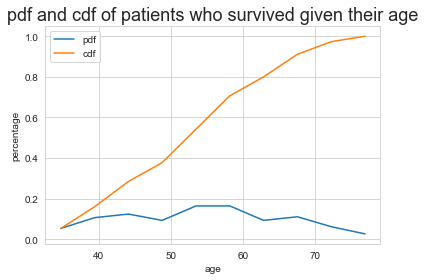

In [74]:
#construct a cdf of feature age on the given data set
#cdf will be of the patients that were able to survive more or equal to the 5 years.
counts, bin_edges = np.histogram(patient_survives["age"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf);
plt.title("pdf and cdf of patients who survived given their age",fontsize=18)
plt.xlabel("age")
plt.ylabel("percentage")
plt.legend(["pdf","cdf"])


plt.show();

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


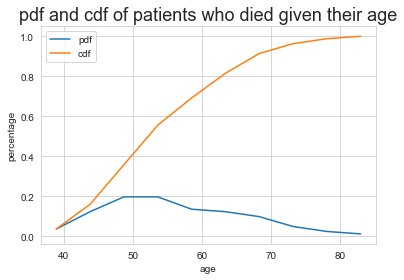

In [80]:
#construct a cdf of feature age on the given data set
#cdf will be of the patients that were not able to survive more or equal to the 5 years.
counts, bin_edges = np.histogram(patient_not_survives["age"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf);
plt.title("pdf and cdf of patients who died given their age",fontsize=18)
plt.xlabel("age")
plt.ylabel("percentage")
plt.legend(["pdf","cdf"])


plt.show();

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


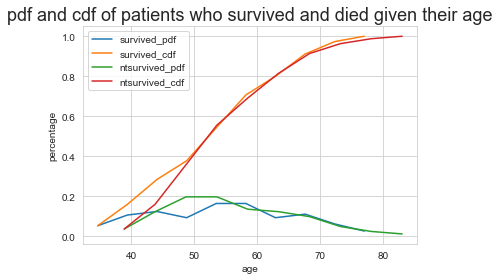

In [76]:
#combined graph of people who were able to survive and who were not able to survive on the feature age

counts, bin_edges = np.histogram(patient_survives["age"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf);


counts, bin_edges = np.histogram(patient_not_survives["age"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf);
plt.title("pdf and cdf of patients who survived and died given their age",fontsize=18)
plt.xlabel("age")
plt.ylabel("percentage")
plt.legend(["survived_pdf","survived_cdf","ntsurvived_pdf","ntsurvived_cdf"])


plt.show();

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


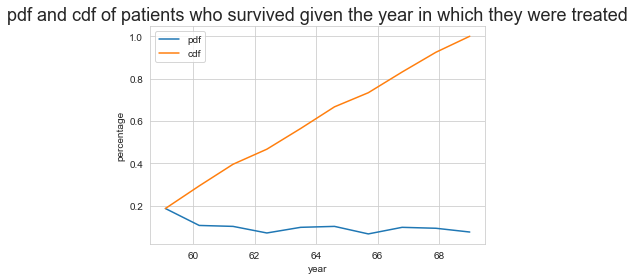

In [77]:
#construct a cdf of feature year on the given data set
#cdf will be of the patients that were able to survive more or equal to the 5 years.
counts, bin_edges = np.histogram(patient_survives["year"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf);
plt.title("pdf and cdf of patients who survived given the year in which they were treated",fontsize=18)
plt.xlabel("year")
plt.ylabel("percentage")
plt.legend(["pdf","cdf"])


plt.show();

[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


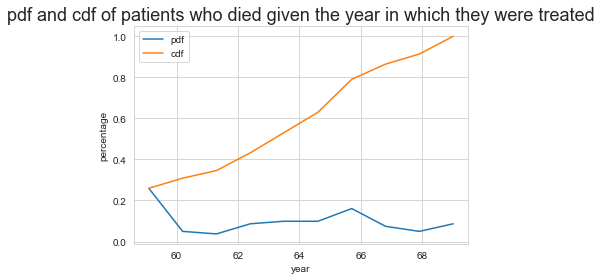

In [81]:
#construct a cdf of feature year on the given data set
#cdf will be of the patients that were not able to survive more or equal to the 5 years.
counts, bin_edges = np.histogram(patient_not_survives["year"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf);
plt.title("pdf and cdf of patients who died given the year in which they were treated",fontsize=18)
plt.xlabel("year")
plt.ylabel("percentage")
plt.legend(["pdf","cdf"])


plt.show();

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


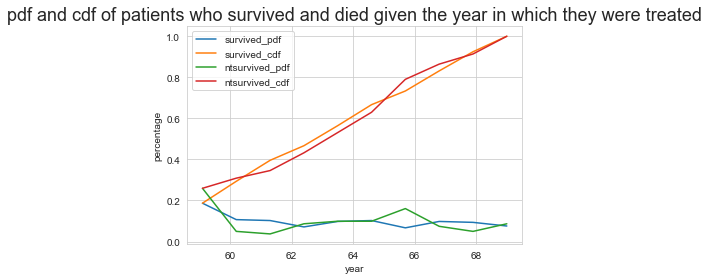

In [79]:
#combine cdf of the people who were able to survie and those who were not able to survive on the basis of feature year
counts, bin_edges = np.histogram(patient_survives["year"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf);

counts, bin_edges = np.histogram(patient_not_survives["year"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf);
plt.title("pdf and cdf of patients who survived and died given the year in which they were treated",fontsize=18)
plt.xlabel("year")
plt.ylabel("percentage")
plt.legend(["survived_pdf","survived_cdf","ntsurvived_pdf","ntsurvived_cdf"])


plt.show();

# Observations of the CDF'S :-
## 1.) 91.5% of people survived greater or equal to 5 years who have nodes <=5(approx)(4.6).We can see as the number of nodes increases the chances becomes very less for survival. About 56.79% of people who have nodes <=5(approx)(5.2) were not able to survive.
## 2.) 16%(15.9%) of people who were less than or equal to 35(approx)(34.7)years of age survived definately
## 3.) From the combined graphs of the year in which the patients were treated We can take account of about 35%(33.68%) who were treated between the year 1961 to 1965 had slighly higher rate of survival compared to the patients who were about 30%(28.34%) which were treated in the year between 1965 to 1967 had low rate of survival.

# (4.5) Mean, Variance and Std-dev

In [54]:
# mean and variance  of the number of nodes in the patients who survived more or equl to 5 years

import numpy as np
print("means:")
print(np.mean(patient_survives["nodes"]))
#mean with an outlier 
print(np.mean(np.append(patient_survives["nodes"],60)))

print("\nstd deviation")
print(np.std(patient_survives["nodes"]))

means:
2.7911111111111113
3.0442477876106193

std deviation
5.857258449412131


In [53]:
# mean and std deviation(variance)of the number nodes of the patients who were not able to survive more or equal to 5 years

import numpy as np
print("means:")
print(np.mean(patient_not_survives["nodes"]))
#mean with an outlier 
print(np.mean(np.append(patient_not_survives["nodes"],60)))

print("\nstd deviation")
print(np.std(patient_not_survives["nodes"]))

means:
7.45679012345679
8.097560975609756

std deviation
9.128776076761632


## Observations:-
### 1.) Mean refers to the total number nodes divided by the total number of patients.
### 2.) Here mean of the patients who survived equal to or more than 5 years is equal to 2.79 which is very less to the mean of patients who survived less than 5 years which is 7.45 , This shows that there is high chance of less survival as compared to chances of more survival.
### 3.) Similarly spread (std deviation - variance ) of patients who survived less than 5 year is more as compared to the patients who survived more or equal to 5 years , This depicts that the spread of short survival is more in the data set

# (4.6) Median, Percentile, Quantile, IQR, MAD

In [67]:
# median , percentile, quantile , iqr , mad of patients who survived equal to or more than 5 years

print("\nMedians:")
print(np.median(patient_survives["nodes"]))
#median with outlier 
print(np.median(np.append(patient_survives["nodes"],60)))

print("\nQuantiles:")
print(np.percentile(patient_survives["nodes"],np.arange(0,100,25)))

print("\n90th Percentiles:")
print(np.percentile(patient_survives["nodes"],90))

from statsmodels import robust
print("\nmedian absolute deviation :")
print(robust.mad(patient_survives["nodes"]))


Medians:
0.0
0.0

Quantiles:
[0. 0. 0. 3.]

90th Percentiles:
8.0

median absolute deviation :
0.0


In [68]:
# median , percentile, quantile , iqr , mad of patients who did not survived equal to or more than 5 years

print("\nMedians:")
print(np.median(patient_not_survives["nodes"]))
#median with outlier 
print(np.median(np.append(patient_not_survives["nodes"],60)))

print("\nQuantiles:")
print(np.percentile(patient_not_survives["nodes"],np.arange(0,100,25)))

print("\n90th Percentiles:")
print(np.percentile(patient_not_survives["nodes"],90))

from statsmodels import robust
print("\nmedian absolute deviation :")
print(robust.mad(patient_not_survives["nodes"]))


Medians:
4.0
4.0

Quantiles:
[ 0.  1.  4. 11.]

90th Percentiles:
20.0

median absolute deviation :
5.930408874022408


## Observations:-
### 1.) Median also serves the same purpose as the mean but it can deal well with the outliers as we can see that in both the cases where patient survives and where patient doesn't survives median remains unchanged.
### 2.) Median of the patients who survive more or equal to 5 years is 0 i.e it shows average number of nodes in more survival is 0 whereas where the survival is less , the average number of nodes is equal to 4.
### 3.) Quantiles show that 50% of patients who survived have nodes = 0 and only 25% of patients had more than 3 nodes whereas 50% of patients had less or equal to 4 nodes where they were not able to survive also 25% of patients had more than 11 nodes
### 4.) 90% of people where patients survived was less or equal to 8 also 90% of people where patients were not able to survive had nodes less or equal to 20 nodes.
### 5.) Median absolute deviation (mad) serves the same purpose that of std deviation but here we use medians and we can see mad of people who survived is 0 i.e spread of people who survived have the nodes count=0, similarly patients who were not able to survive had a mad value of 5.93 i.e. spread of people who didn't survived had the nodes count = 6(5.9) . MAD shows the spread over the value of nodes which is greater at number of nodes =0 where patients survived whereas the spread over the value of nodes which is greater at number of nodes=6 where patients were not able to survive.

# (4.7) Box plot and Whiskers 

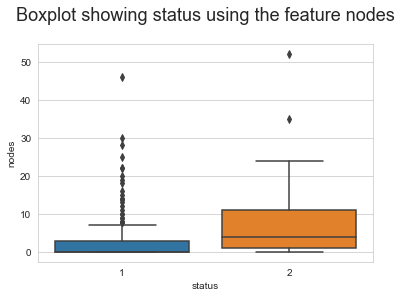

In [22]:
# box plots and whiskers are the ways to interpret the data more clearly
# box plots deal with uni variable analysis
import seaborn as sns
sns.boxplot(x="status",y="nodes", data=cancer)
plt.title("Boxplot showing status using the feature nodes",fontsize=18,y=1.08)
plt.show()

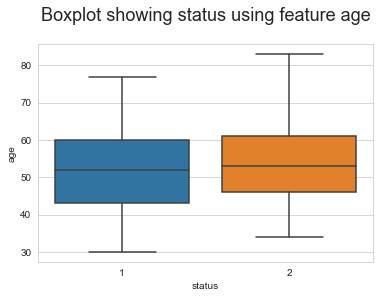

In [83]:
sns.boxplot(x="status",y="age", data=cancer)
plt.title("Boxplot showing status using feature age",fontsize=18,y=1.08)
plt.show()

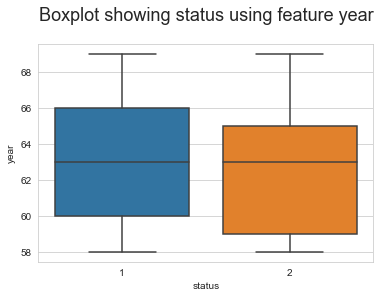

In [23]:
sns.boxplot(x="status",y="year", data=cancer)
plt.title("Boxplot showing status using feature year",fontsize=18,y=1.08)
plt.show()

# Observations:-
### 1.) Box plots are the other ways to showcase the percentile values of any given features. Here , nodes, year and age are used as the feature to predict the status of the patients.
### 2.) Box plots are being divided into three parts which is 25th percentile, 50th percentile and 75th percentile values of the feature corresponding to it. Start of the bax marks as 25th, middle line marks 50th  and upper line marks 75th percentiles respectively.
### 3.) From 1st Box plot which uses nodes as the feature we can draw following conclusions :-
####     a.)75th percentile of patients who survived is roughly equal to the 50th percentile of patients who didn't survived and the          number of nodes is roughly equal to 4
####     b.)75th percentile patients who were not able to survive had number of nodes equal to or less than 11.
####     c.)25th percentile and 50th percentile of patients who survived coincide including the whiskers the number of nodes for good survival lies in the range 0-7
####     d.)Similarly if we include the whiskers of of people who were not able to survive the number of nodes would be in range 0-25.
####     e.)If nodes  lie between 0–7 nodes there is 50% chances of error in predicting the status as the patients who were not able to survive also lies in this region
### 4.) All other boxplots are not able to provide any useful information in order to sustain our objective because they overlap alot.

# (4.8) Violin plots

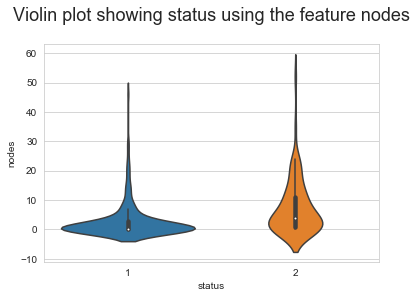

In [24]:
# we plot a violin plot which serves the same purpose but in different manner
sns.violinplot(x="status",y="nodes", data=cancer)
plt.title("Violin plot showing status using the feature nodes",fontsize=18,y=1.08)
plt.show()

## observations:-
### 1.)violin plot depicts the same story as the box plot but here spread of data is shown.
### 2.)From violin 1 we can conclude most of the people who survived had nodes in the range 0-7.
### 3.)From violin 2 we can conclude most of the people wo were not able to survive had nodes in the range 0-25 and threshold  lies in 0-12.

# (4.9) Contour plots :-


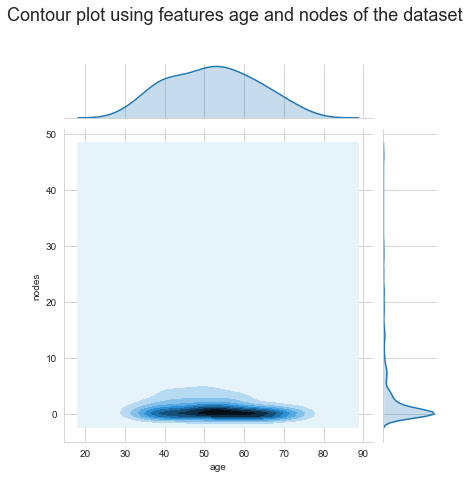

In [32]:
# we will now draw the contour plot to visualize the data 
sns.jointplot(x="age",y="nodes", data = patient_survives ,kind="kde")
plt.suptitle("Contour plot using features age and nodes of the dataset",fontsize=18,y=1.10)

plt.show()

# Observations:-
## 1.) countour plots are just other plots to analyse the story that we have gone through till now using different plots and graphs.
## 2.)Contour plots are the plots in which if the number of data points  is more on specific point that area will get darker.
## 3.)Above contour plot is plotted between age and number of nodes of the patients who were able to survive.
## 4.)From age range 48–62 and axillary nodes from 0–3 density is much larger , which shows these attributed patients have high chance of survival.

# (4.10) Final conclusions:-
## 1.) We cannot construct a simple model of if else statements with high accuracy to predict wheteher the patient will be able to survive equal or more than 5 years using various features of the data set.
## 2.) Number of nodes though helps us to predict the status as lesser the number of nodes greater is the survival chances. We have seen cases were this isn't guaranteed if the patient has less number of nodes(0-4) survived equal or more than 5 years.
## 3.) If the age of the patient is less than 35 years there is good chance of their longer survival and about 16% of people who are less than 35 years of age survived definately.
## 4.)There is no particular symmetry in the data set and hence drawing exact conclusions about the status of the patient is the difficult task.
